/var/folders/dy/ypdslq3j27b8qsqchnzr7dhr0000gn/T/ipykernel_56374/1386128097.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'Gender']).size().unstack()


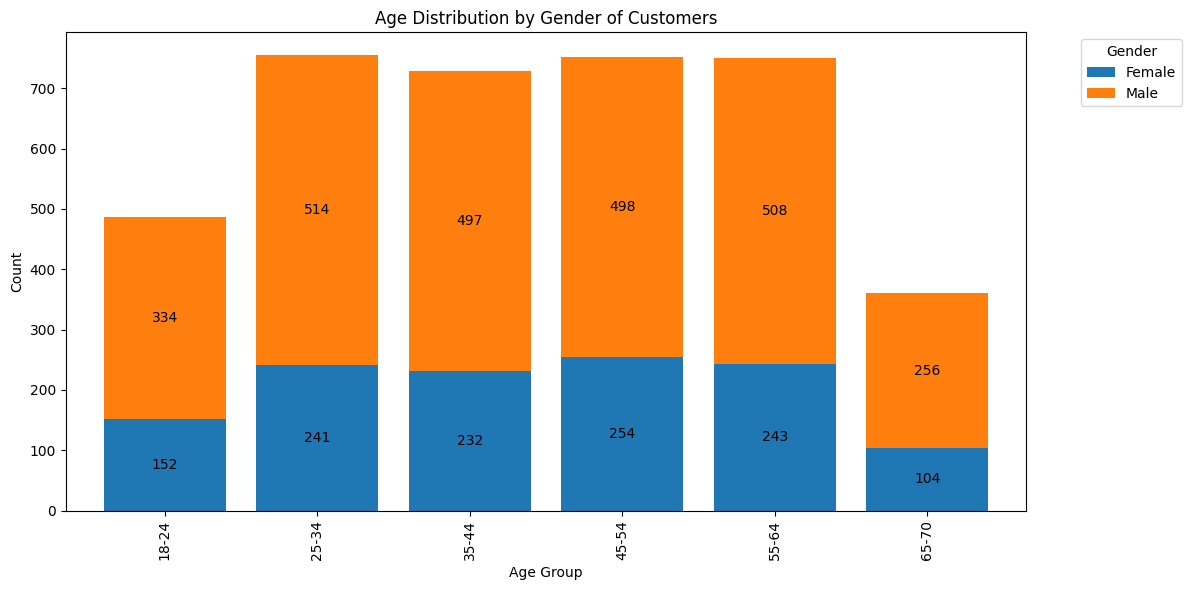

In [6]:
# code for visualization age/gender graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_behavior_updated.csv')

bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grouped = df.groupby(['age_group', 'Gender']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)

plt.title('Age Distribution by Gender of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

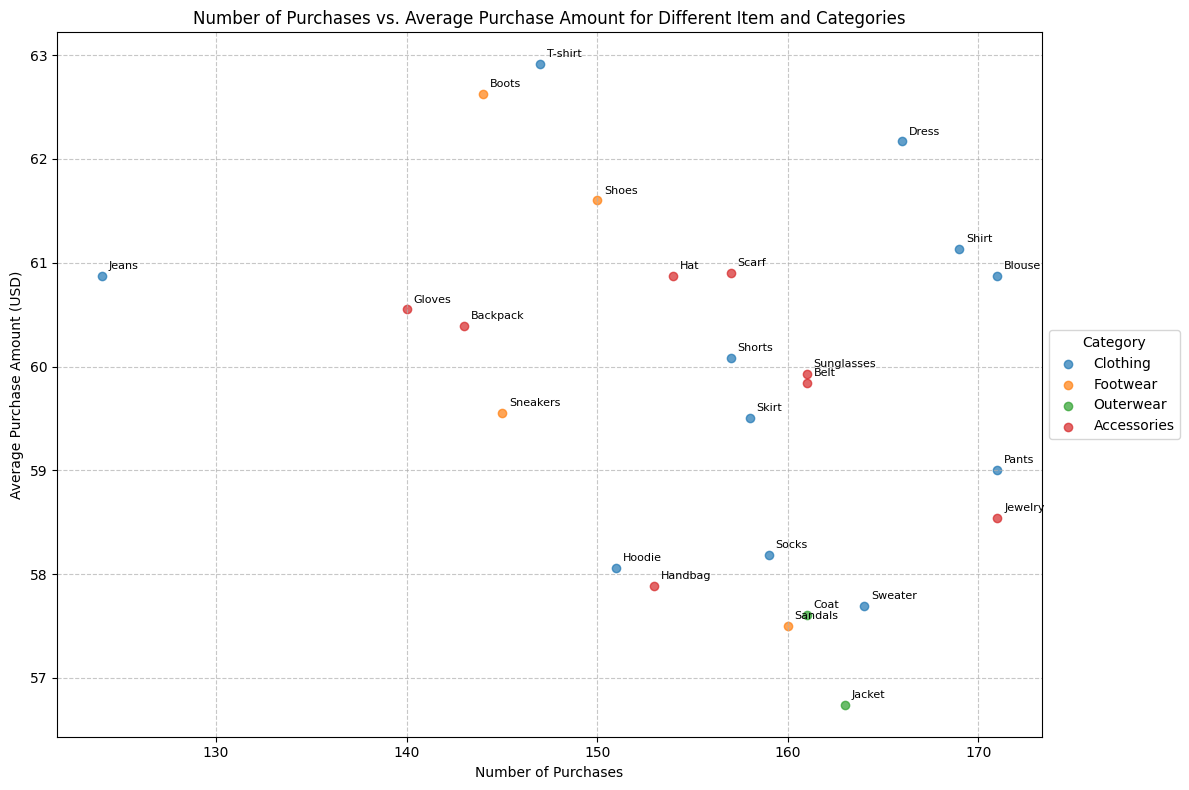

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_behavior_updated.csv')

item_data = df.groupby('Item Purchased').agg({
    'Purchase Amount (USD)': 'mean',
}).reset_index()
item_data['Number_of_Purchases'] = df['Item Purchased'].value_counts()[item_data['Item Purchased']].values
item_data.columns = ['Item', 'Average_Purchase_Amount', 'Number_of_Purchases']

plt.figure(figsize=(12, 8))
category_colors = {category: plt.cm.tab10(i) for i, category in enumerate(df['Category'].unique())}

for category in df['Category'].unique():
    category_data = item_data[item_data['Item'].isin(df[df['Category'] == category]['Item Purchased'])]
    plt.scatter(
        category_data['Number_of_Purchases'],
        category_data['Average_Purchase_Amount'],
        c=[category_colors[category]],
        alpha=0.7,
        label=category
    )
for _, row in item_data.iterrows():
    plt.annotate(row['Item'], (row['Number_of_Purchases'], row['Average_Purchase_Amount']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Number of Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Number of Purchases vs. Average Purchase Amount for Different Item and Categories')
plt.legend(title='Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
